In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('C:/Users/nschl/OneDrive/Documents/Capstone/WindEnegyOutputPredictor/Data/weather_station_data.csv')
missing_values = df.isna().sum()
print(f"This is the shape before doing any subsetting:{df.shape}")
print("Here is the counts of missing Values:")
print(missing_values)
print("Here is the shape after dropping the columns with the most missing values.")
df = df.drop(["tsun"],axis = 1)
print(df.shape)
df_no_missing = df.dropna()

# Get unique latitude and longitude pairs with no missing values
unique_lat_lon = df_no_missing[['latitude', 'longitude']].drop_duplicates()
print(unique_lat_lon)


This is the shape before doing any subsetting:(486001, 12)
Here is the counts of missing Values:
tavg         116352
tmin         104574
tmax         105111
prcp         178555
wspd         169924
pres         266662
tsun         483436
latitude          0
longitude         0
elevation         0
state          1605
time              0
dtype: int64
Here is the shape after dropping the oclumns with the most missing values.
(486001, 11)
        latitude  longitude
8        62.9500  -155.6000
116      62.8944  -155.9765
288      63.8667  -152.3000
396      64.7272  -155.4699
493      64.7333  -156.9333
...          ...        ...
472802   36.8949   -81.3499
478504   42.9000  -106.4667
478995   44.3811  -106.7218
479117   42.8000  -105.3833
479452   44.3333  -105.5500

[2775 rows x 2 columns]


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Sample data

df = pd.read_csv('C:/Users/nschl/OneDrive/Documents/Capstone/WindEnegyOutputPredictor/Data/weather_station_data.csv')

lat_lon_data = df[['latitude', 'longitude']]

# Step 2: Apply KMeans clustering (choose the number of clusters)
kmeans = KMeans(n_clusters=50, random_state=0)  # Adjust n_clusters as needed
df['cluster'] = kmeans.fit_predict(lat_lon_data)

# Step 3: Create a DataFrame of missing values per cluster
missing_values = df.isnull().groupby(df['cluster']).sum()

# Add a column for the count of rows per cluster
missing_values['count'] = df.groupby('cluster').size()

# Print the DataFrame with missing values summary per cluster

# Calculate the percentage of missing values per attribute in each cluster
missing_percentages = (missing_values.drop(columns='count').div(missing_values['count'], axis=0)) * 100

# Display the DataFrame with the percentage of missing values
print(missing_percentages)




              tavg       tmin       tmax       prcp       wspd       pres  \
cluster                                                                     
0        24.344176  23.784540  24.291710  32.913606  44.246240  52.151102   
1        37.575566  35.814540  35.783000  50.864743  45.975924  61.988120   
2        17.282037  14.714998  14.708260  27.145937  25.057270  45.458833   
3        63.915094  19.339623  19.339623  16.273585  55.896226  63.915094   
4        40.084686  39.049635  39.049635  48.506234  44.107269  59.115502   
5        15.065464  12.423625  12.423625  32.097760  28.385220  52.231597   
6        30.237804  28.827897  28.827897  45.070025  38.810039  59.093900   
7        38.530184  51.916010  51.968504  63.412073  54.750656  52.965879   
8        25.411698  23.556691  23.556691  37.838349  35.652092  51.012682   
9        38.148419  34.203110  34.203110  47.510698  45.903350  57.467905   
10       13.068182  12.459416  12.418831  14.204545  13.311688  42.167208   

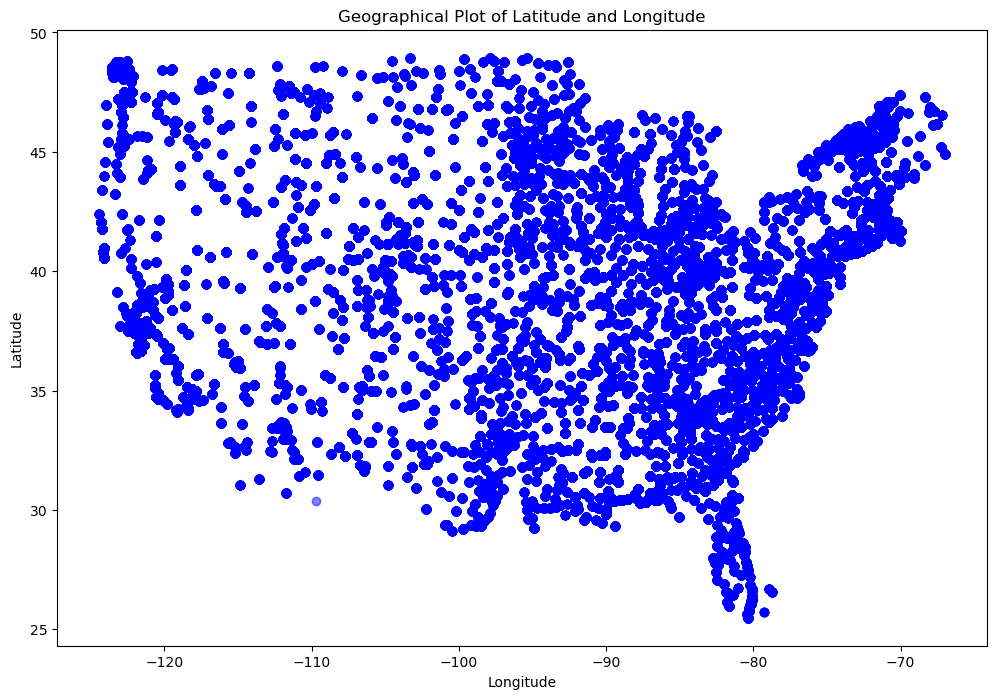

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is already defined and includes 'latitude' and 'longitude' columns
df = pd.read_csv('C:/Users/nschl/OneDrive/Documents/Capstone/WindEnegyOutputPredictor/Data/weather_station_data.csv')
df = df[(df["latitude"]>25) & (df["latitude"]<49)]
df = df[(df["longitude"]>-125) & (df["longitude"]<-66.9)]
# Plotting the latitude and longitude
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c='blue', alpha=0.5, marker='o')

# Adding labels and title
plt.title('Geographical Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


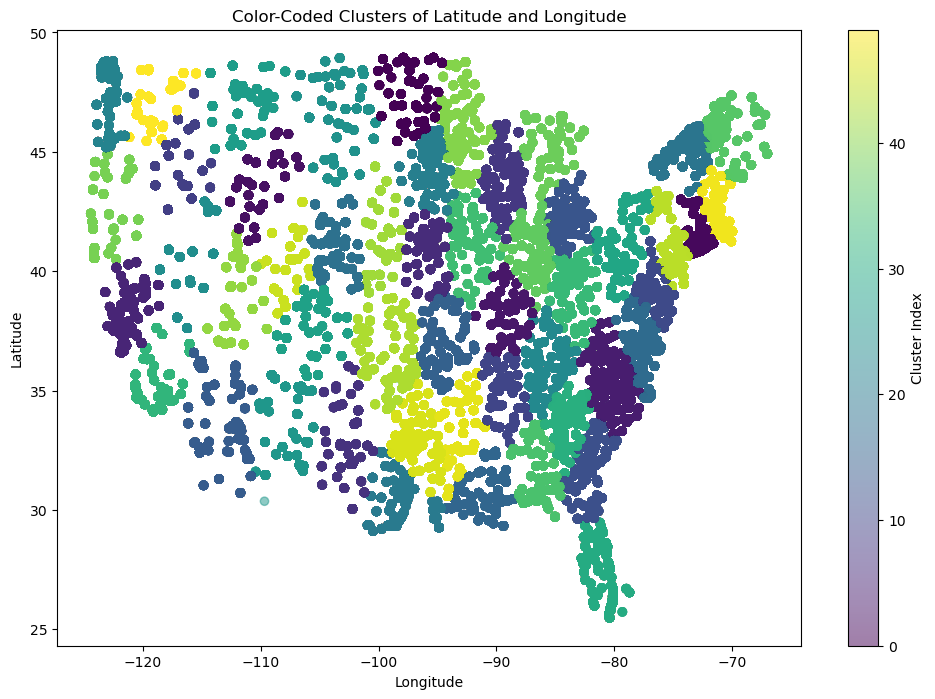

In [ ]:
#Run this subsetting before every time doing anaylis
df = pd.read_csv('C:/Users/nschl/OneDrive/Documents/Capstone/WindEnegyOutputPredictor/Data/weather_station_data_Updated.csv')
df = df[(df["latitude"]>25) & (df["latitude"]<49)]
df = df[(df["longitude"]>-125) & (df["longitude"]<-66.9)]
lat_lon_data = df[['latitude', 'longitude']]
df.to_csv(")

# Apply KMeans clustering (choose the number of clusters)
kmeans = KMeans(n_clusters=50, random_state=0)  # Adjust n_clusters as needed
df['cluster'] = kmeans.fit_predict(lat_lon_data)

# Plot the clusters with color-coding
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', alpha=0.5, marker='o')

# Adding labels and title
plt.title('Color-Coded Clusters of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a color bar to show cluster indices
plt.colorbar(label='Cluster Index')

# Show the plot
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df' is already defined and includes 'latitude' and 'longitude' columns with 'cluster' column

# Plotting the clusters with color-coding
plt.figure(figsize=(12, 8))

# Scatter plot with color coding by cluster
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', alpha=0.5, marker='o')

# Adding labels and title
plt.title('Color-Coded Clusters of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a color bar to show cluster indices
plt.colorbar(label='Cluster Index')

# Show the plot
plt.show()


KeyError: 'cluster'

<Figure size 1200x800 with 0 Axes>